<div style="background-color: #8e7cc3; padding: 7px; text-align: center;">
    <h2>Projeto Estatística I | Análise Exploratória de Dados (EDA) em Python</h2>
</div>

# Sumário 


- [Descrição](#descrição)
- [Importando Bibliotecas e Módulos](#importando-bibliotecas-e-módulos)
- [Exploração Inicial](#exploração-inicial)
- [Análise Hipótese](#análise-hipótese)
- [Conclusão](#conclusão)

## Descrição

**Motivação:** Gostaríamos de entender como a preparação prévia dos alunos se relaciona às notas alcançadas em testes de conhecimento em matemática, escrita e leitura.

**Hipótese:** Estudantes que completaram o curso de preparação para o teste têm notas maiores.

**``H0 (hipótese nula):``** A média das notas totais dos testes é igual para alunos que completaram e não completaram o curso.

*média notas com preparação <= média notas sem preparação*

**``H1 (hipótese alternativa):``** A média das notas totais dos testes é diferente para alunos que completaram e não completaram o curso.

*média notas com preparação > média notas sem preparação*

**Dados:**

``study_performance.csv``

| Colunas                     | Descrição                                      | Classificação        |
|-----------------------------|------------------------------------------------|----------------------| 
| gender                      | Gênero do aluno                                | Qualitativa Nominal  |
| race_ethnicity              | Grupo étnico do aluno                          | Qualitativa Nominal  | 
| parental_level_of_education | Último nível de educação dos pais              | Qualitativa Ordinal  |
| lunch                       | Almoço antes do teste                          | Qualitativa Nominal  |
| test_preparation_course     | Finalização do curso preparatório para o teste | Qualitativa Nominal  |
| math_score                  | Nota em matemática                             | Quantitativa Discreta|
| reading_score               | Nota em leitura                                | Quantitativa Discreta|
| writing_score               | Nota em escrita                                | Quantitativa Discreta|

Os dados foram retirados da plataforma Kaggle e podem ser encontrados [aqui](https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance). 

## Importando Bibliotecas e Módulos

In [32]:
# Bibliotecas
import pandas as pd
from scipy import stats


# Módulos
import funcoes_graficos as fns 

## Exploração Inicial

In [33]:
# Carregando dados
URL = 'https://raw.githubusercontent.com/tainahguerras/Estatistica-ADA-Santander/main/data/study_performance.csv?token=GHSAT0AAAAAACPQTJF2RXJM7QLNQAEEFDSKZQMSP6A'
data = pd.read_csv(URL)

In [34]:
print('Forma do dataset:',data.shape)

Forma do dataset: (1000, 8)


In [35]:
# Renomeando variável 
data.rename(columns={'test_preparation_course' : 'preparation_course'}, inplace=True)
# Criando coluna de notas totais
data['score_sum'] = data['math_score'] + data['reading_score'] + data['writing_score']

In [36]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,preparation_course,math_score,reading_score,writing_score,score_sum
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [37]:
# Checando dtype das variáveis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   preparation_course           1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
 8   score_sum                    1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [38]:
# Checando valores faltantes
data.isnull().sum() 

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
preparation_course             0
math_score                     0
reading_score                  0
writing_score                  0
score_sum                      0
dtype: int64

In [39]:
# Checando registros duplicados
data.duplicated().sum() 

0

In [40]:
# Proporção da variável preparation_course
frequencia = data['preparation_course'].value_counts()
porcentagem = data['preparation_course'].value_counts(normalize=True) * 100

pd.DataFrame({'Frequencia' : frequencia, 'Percentual (%)' : round(porcentagem,2)})

,Frequencia,Percentual (%)
preparation_course,,
none,642,64.2
completed,358,35.8


In [41]:
# Checando medidas estatísticas 
data.groupby('preparation_course')[['score_sum']].agg(['min', 'mean', 'median', 'max'])

score_sum                        
                         min        mean median  max
preparation_course                                  
completed                103  218.008380  220.5  300
none                      27  195.116822  196.0  300

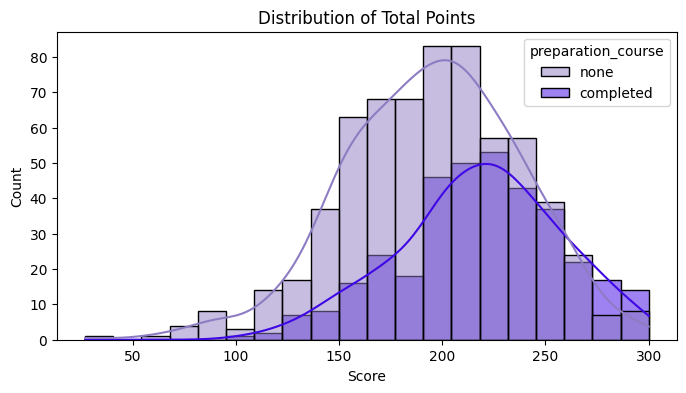

In [42]:
fns.create_histogram(data['score_sum'], data['preparation_course'], 'Distribution of Total Points', 'Score', 'Count')

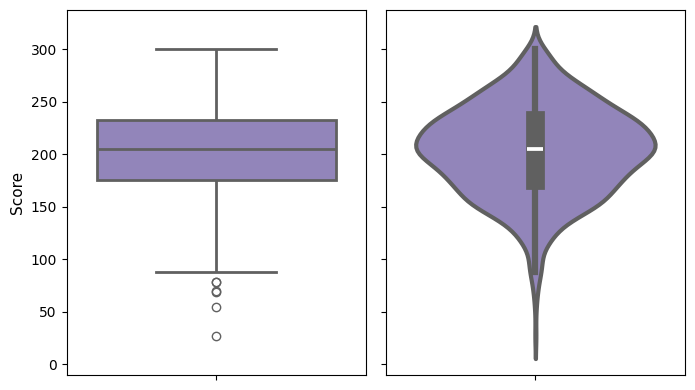

In [43]:
fns.create_violin_boxplot(data=data['score_sum'], title='', ylabel='Score', size = (7.05,4))

In [44]:
# Identificando os Outliers
iqr = data['score_sum'].quantile(.75) - data['score_sum'].quantile(.25)
outlier = data['score_sum'].quantile(.25) - 1.5 * iqr
outliers = data[data['score_sum'] < outlier][['preparation_course', 'score_sum']]
print(f'Mantemos os outliers pelo fato da quantidade ({outliers.shape[0]}) não alterar o resultado da análise e nem do teste de hipótese.\n')
print('Porém, é curioso que todos outliers, alunos com notas baixissímas, não realizaram o curso preparatório.')
outliers

Mantemos os outliers pelo fato da quantidade (6) não alterar o resultado da análise e nem do teste de hipótese.

Porém, é curioso que todos outliers, alunos com notas baixissímas, não realizaram o curso preparatório.


,preparation_course,score_sum
17,none,78
59,none,27
76,none,78
327,none,70
596,none,69
980,none,55


## Análise Hipótese

In [45]:
normal_test = stats.normaltest(data['score_sum'])
pvalue = normal_test.pvalue
print(f"p-value: {pvalue}")
if pvalue <= 0.05:
    print('Rejeitamos H0; não é normal')
else:
    print('Aceitamos H0; é normal')

p-value: 0.0005037851534493755
Rejeitamos H0; não é normal


In [46]:
data['preparation_course'] = data['preparation_course'].map({'none' : 0, 'completed' : 1})
data['preparation_course'] = data['preparation_course'].astype(int)

# Pegando uma amostra aleatória com o mesmo numero de elementos de cada categoria
x = data.query('preparation_course == 0').sample(n=350, random_state=101)['preparation_course']
y = data.query('preparation_course == 1').sample(n=350, random_state=101)['preparation_course']
utest = stats.mannwhitneyu(x, y, alternative = 'less')
pvalue = utest.pvalue

print('H0: μ notas com preparação <= μ notas sem preparação')
print('H1: μ notas com preparação > μ notas sem preparação\n')
print('Mann-Whitney U p-value:', pvalue)

if pvalue <= 0.05:
  print('\nRejeitamos H0, ou seja, a média da soma das notas dos alunos que concluíram o curso é maior dos que não concluiuram.')
else:
  print('\nAceitamos H0, portanto não existe diferença relevante entre a soma das notas dos alunos que realizaram ou não o curso.')

H0: μ notas com preparação <= μ notas sem preparação
H1: μ notas com preparação > μ notas sem preparação

Mann-Whitney U p-value: 2.48091916303042e-154

Rejeitamos H0, ou seja, a média da soma das notas dos alunos que concluíram o curso é maior dos que não concluiuram.


## Conclusão

Nesse banco de dados com uma amostra de 1.000 alunos, queríamos entender como a preparação prévia dos alunos se relaciona às notas alcançadas em testes de conhecimento em matemática, escrita e leitura.

Durante a exploração inicial, criamos uma nova coluna com a soma das notas, verificamos os tipos das variáveis e também se havia dados nulos ou faltantes.

Na análise exploratória, utilizando medidas estatísticas e gráficos, verificamos como as notas totais se distribuem.

Em seguida, realizamos um teste de hipótese para responder se a média das notas dos alunos que realizaram o curso de preparação é maior dos que não realizaram.

Por fim, concluímos que o curso de preparação para as provas é relevante para a boa performance dos alunos.

